# LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans

## Membaca dataset

In [29]:
df = pd.read_csv("Attrition-Clean.csv")

In [30]:
df.head()

,Unnamed: 0,Umur,Kelamin,Pendidikan,RateHarian,JarakDariRumah,KepuasanKerja,TotalBekerjaSetahun,Attrition,Departemen_Human Resources,Departemen_Research & Development,Departemen_Sales,BisnisPerjalanan_Non-Travel,BisnisPerjalanan_Travel_Frequently,BisnisPerjalanan_Travel_Rarely
0,0,41,0,2,1102.0,1,3,8,Yes,0,0,1,0,0,1
1,1,49,1,1,279.0,8,2,10,No,0,1,0,0,1,0
2,2,37,1,2,1373.0,2,2,7,Yes,0,1,0,0,0,1
3,3,33,0,4,1392.0,3,3,8,No,0,1,0,0,1,0
4,4,27,1,1,591.0,2,3,6,No,0,1,0,0,0,1


In [37]:
df.drop(['Unnamed: 0'],axis=1).values

array([[41, 0, 2, ..., 0, 0, 1],
       [49, 1, 1, ..., 0, 1, 0],
       [37, 1, 2, ..., 0, 0, 1],
       ...,
       [27, 1, 3, ..., 0, 0, 1],
       [49, 1, 3, ..., 0, 1, 0],
       [34, 1, 3, ..., 0, 0, 1]], dtype=object)

## Mencari nilai null

In [38]:
df.isna().sum()

Unnamed: 0                            0
Umur                                  0
Kelamin                               0
Pendidikan                            0
RateHarian                            0
JarakDariRumah                        0
KepuasanKerja                         0
TotalBekerjaSetahun                   0
Attrition                             0
Departemen_Human Resources            0
Departemen_Research & Development     0
Departemen_Sales                      0
BisnisPerjalanan_Non-Travel           0
BisnisPerjalanan_Travel_Frequently    0
BisnisPerjalanan_Travel_Rarely        0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1470 non-null   int64  
 1   Umur                                1470 non-null   int64  
 2   Kelamin                             1470 non-null   int64  
 3   Pendidikan                          1470 non-null   int64  
 4   RateHarian                          1470 non-null   float64
 5   JarakDariRumah                      1470 non-null   int64  
 6   KepuasanKerja                       1470 non-null   int64  
 7   TotalBekerjaSetahun                 1470 non-null   int64  
 8   Attrition                           1470 non-null   object 
 9   Departemen_Human Resources          1470 non-null   int64  
 10  Departemen_Research & Development   1470 non-null   int64  
 11  Departemen_Sales                    1470 no

## Menampilkan Nilai Korelasi

In [40]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_9228\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Umur,Kelamin,Pendidikan,RateHarian,JarakDariRumah,KepuasanKerja,TotalBekerjaSetahun,Departemen_Human Resources,Departemen_Research & Development,Departemen_Sales,BisnisPerjalanan_Non-Travel,BisnisPerjalanan_Travel_Frequently,BisnisPerjalanan_Travel_Rarely
Unnamed: 0,1.000000,-0.010863,0.022075,0.041901,-0.050000,0.032928,-0.007105,-0.014095,0.063887,-0.042898,0.016250,0.022587,-0.008074,-0.008106
Umur,-0.010863,1.000000,-0.036071,0.207788,0.008687,-0.001951,0.029936,0.680320,0.020462,0.018102,-0.027748,-0.011316,-0.024127,0.028328
Kelamin,0.022075,-0.036071,1.000000,-0.016547,-0.010643,-0.001851,0.017960,-0.046881,0.035652,0.015760,-0.032017,0.050461,-0.022015,-0.014682
Pendidikan,0.041901,0.207788,-0.016547,1.000000,-0.016891,0.021042,0.042438,0.148280,0.011435,-0.018604,0.014215,0.004524,-0.008292,0.004126
RateHarian,-0.050000,0.008687,-0.010643,-0.016891,1.000000,-0.004315,0.044588,0.014441,-0.026554,0.014238,-0.003036,0.012400,-0.011358,0.001515
JarakDariRumah,0.032928,-0.001951,-0.001851,0.021042,-0.004315,1.000000,0.008783,0.004628,-0.012901,-0.008117,0.014085,0.023605,0.005081,-0.020116
KepuasanKerja,-0.007105,0.029936,0.017960,0.042438,0.044588,0.008783,1.000000,-0.005533,0.004789,0.023187,-0.026107,-0.045779,0.004424,0.026714
TotalBekerjaSetahun,-0.014095,0.680320,-0.046881,0.148280,0.014441,0.004628,-0.005533,1.000000,0.007508,0.011087,-0.014781,-0.029742,-0.012177,0.030320
Departemen_Human Resources,0.063887,0.020462,0.035652,0.011435,-0.026554,-0.012901,0.004789,0.007508,1.000000,-0.290754,-0.139650,-0.004755,-0.007485,0.009618
Departemen_Research & Development,-0.042898,0.018102,0.015760,-0.018604,0.014238,-0.008117,0.023187,0.011087,-0.290754,1.000000,-0.906818,-0.005013,0.003340,0.000465


# ALGORITMA K-MEANS CLUSTERING

In [72]:
points = df[['RateHarian','KepuasanKerja']]
points = points.values

In [73]:
model = KMeans(n_clusters=5)
model.fit(points)

KMeans(n_clusters=5)

In [74]:
y = model.fit_predict(points)
print(y)

[1 2 3 ... 2 1 0]


# Visuaslisasi

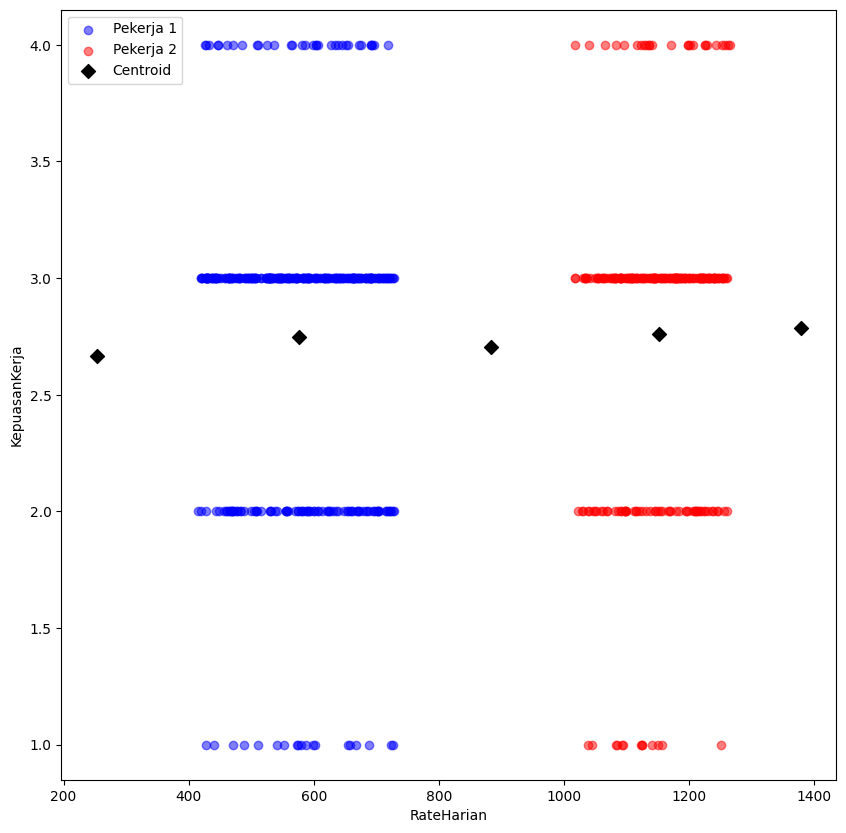

In [76]:
centroids = model.cluster_centers_

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0], points[y==0,1], c='blue', label='Pekerja 1', alpha=0.5)
plt.scatter(points[y==1,0], points[y==1,1], c='red', label='Pekerja 2', alpha=0.5)


plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", c='black')
plt.xlabel("RateHarian")
plt.ylabel("KepuasanKerja")
plt.legend()
plt.show()

In [77]:
cluster = range(1,7)
inertias = []

for n in cluster:
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

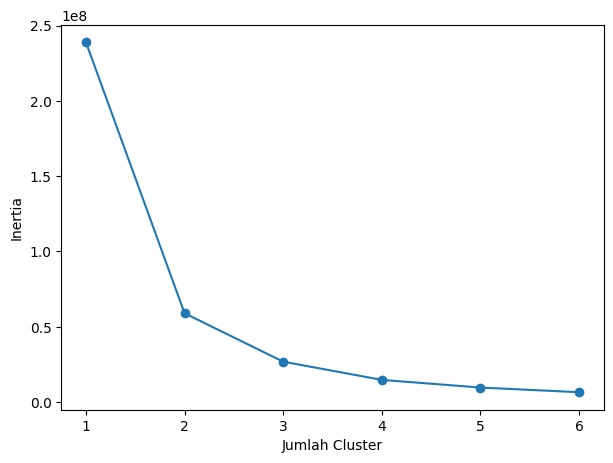

In [88]:
plt.figure(figsize = (7,5))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(cluster)
plt.show()

# Hierarchical Clustering

## Import library

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [90]:
linkage_hr = linkage(points, method='ward')
complete_hr = complete(points)


# Visuaslisasi

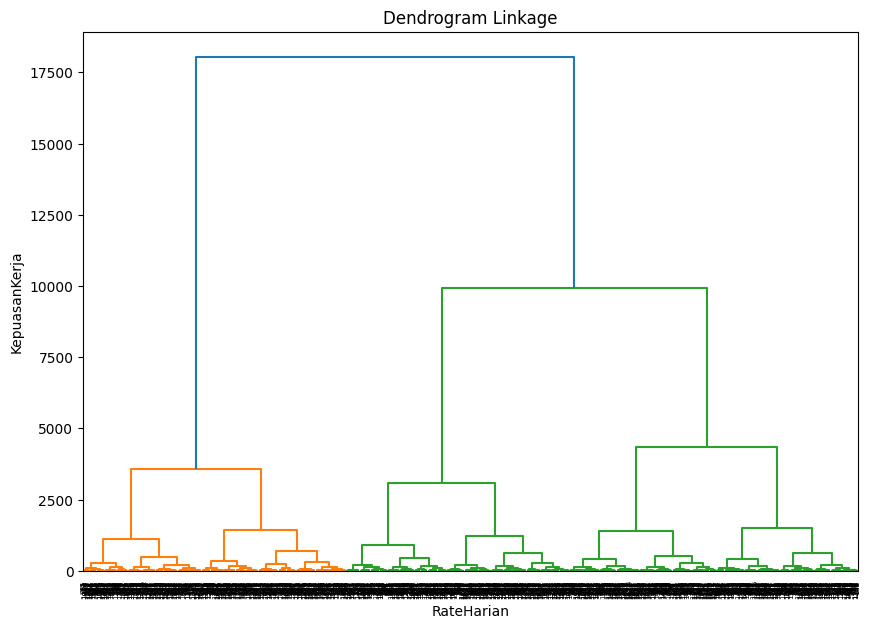

In [91]:
plt.figure(figsize=(10,7))
dendrogram(linkage_hr)
plt.title("Dendrogram Linkage")
plt.xlabel("RateHarian")
plt.ylabel("KepuasanKerja")
plt.show()

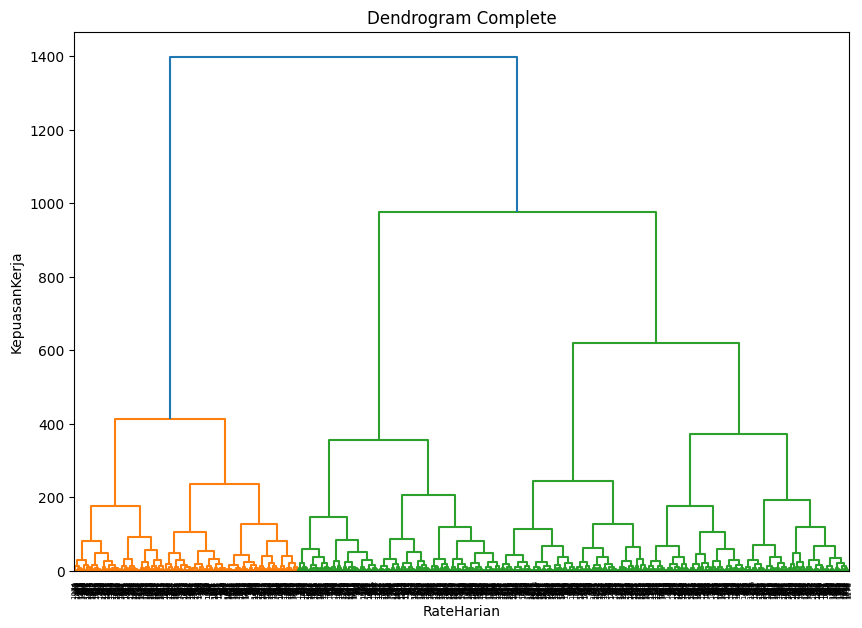

In [92]:
plt.figure(figsize=(10,7))
dendrogram(complete_hr)
plt.title("Dendrogram Complete")
plt.xlabel("RateHarian")
plt.ylabel("KepuasanKerja")
plt.show()

## Import library AgglomerativeClustering

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [94]:

hr_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [95]:
hr_predict = hr_cluster.fit_predict(points)

# Visuaslisasi

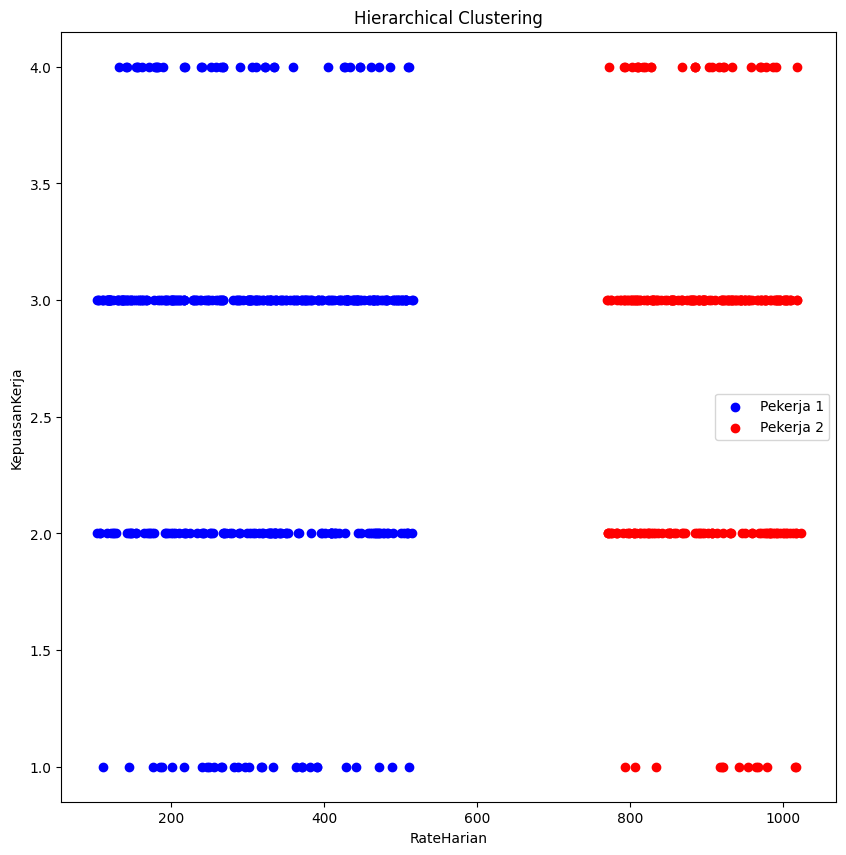

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(points[hr_predict==0,0], points[hr_predict==0,1], c='blue', label='Pekerja 1')
plt.scatter(points[hr_predict==1,0], points[hr_predict==1,1], c='red', label='Pekerja 2')
plt.title("Hierarchical Clustering")
plt.xlabel("RateHarian")
plt.ylabel("KepuasanKerja")
plt.legend()
plt.show()